- 어떻게 하면 정확도를 높일 수 있을까?
    - 범주형 변수를 줄여 상관도를 높이는 방식
    - pycaret 사용
    - 모델 파라미터 조정
    - Oversampling 

## 데이터 불러오기

In [ ]:
import pandas as pd

# csv 형식으로 된 데이터 파일을 읽어옵니다.
train = pd.read_csv('/content/drive/MyDrive/Dacon/data/소득예측/train.csv')
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Dacon/data/소득예측/test.csv')
test.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico


- id : 샘플 아이디
- age : 나이
- workclass : 일 유형
- fnlwgt : CPS(Current Population Survey) 가중치
- education : 교육수준
- education.num : 교육수준 번호
- marital.status : 결혼 상태
- occupation : 직업
- relationship : 가족관계
- race : 인종
- sex : 성별
- capital.gain : 자본 이익
- capital.loss : 자본 손실
- hours.per.week : 주당 근무시간
- native.country : 본 국적
- target : 소득
        				   0 = <=50K (5만 달러 이하)

     					   1 = >50K (5만 달러 초과) 

- 결혼 상태의 경우 기혼자와 미혼자 두 분류로 나누어 보는 방법
    - 완전히 이혼, 과부가 되거나 하지 않는 이상 혼인 관계가 유지 되고 있다면 금전적인 문제로 엮여 있을거라는 생각에 Alone / Not-Alone으로 분류
- 가족 관계의 경우 결혼한 상태와 아닌 상태로 나누어 분류
- 교육 수준의 경우 중졸, 고졸, 전문대, 대졸 학사, 석사, 박사 등 6개로 나누어 분류
    - 고졸 이하 : '7th-8th', '1st-4th', '10th', '11th', , '5th-6th', '9th', '12th', 'Preschool' HS-grad
    - 전문대 :  'Assoc-acdm', 'Some-college', 'Prof-school',   'Assoc-voc'
    - 대졸 학사 :'Bachelors'
    - 대졸 석박사 : Doctorate, 'Masters'

   
      
     

## 데이터 살펴보기

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


- 범주형 데이터(8개)와 수치형 데이터(7개)로 주로 이루어져 있음을 확인
- 3 column에 결측치가 있음을 확인

In [ ]:
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target
count,17480.000000,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.00000,17480.000000,17480.000000
mean,8739.500000,38.720995,1.897610e+05,10.036556,1076.644508,83.87460,40.002460,0.234897
std,5046.185688,14.079617,1.049929e+05,2.604415,7439.498620,396.03288,12.671265,0.423947
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,4369.750000,27.000000,1.181558e+05,9.000000,0.000000,0.00000,38.000000,0.000000
50%,8739.500000,37.000000,1.781340e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,13109.250000,48.000000,2.373180e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,17479.000000,90.000000,1.455435e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


- 자본손익의 경우 최대값과 최소값의 차이가 극명함. 이상치가 존재할 것으로 보임


## 결측치 확인

- 결측치 존재
- 문자열 / 정수형 데이터 

In [ ]:
train.isnull().sum()

id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

- Null 값 존재
 - workclass(일 유형) : 1836
 - occupation(직업) : 1843
 - native.country(국적) : 583

- 해당 Null 값은 어떻게 대체할 것인가?
 - 행 삭제? 중위수? 평균?
 - 해당 컬럼의 성격에 맞게 결측치 대체가 이루어져야 함
 - 범주형 데이터이기 때문에 중위수, 평균이 아니라 최빈값 기준으로 이루어져야 함
  - 일 유형 / 직업의 경우, 나이 / 교육수준이 비슷한 사람들끼리 연봉 수준이나 업무의 유형이 비슷할 것으로 생각되기 때문에 비슷한 데이터들의 최빈값으로 대체 고려. 
  - 국적의 경우, 해당 컬럼이 데이터 분석에서 얼마나 유의미할지는 모르겠지만 국가별 소득 수준, 교육 수준이 평균적으로 다를 것으로 생각. 해당 데이터들의 최빈값 혹은 중위수로 대체
  - CPS weights에 대한 의미 체감이 잘 되지 않지만, 해당 데이터가 중요할 것으로 생각
  - 결측치 전부가 범주형 데이터이기 때문에, 해당 데이터를 살펴보고 패턴이 없다면 제거하는 방법 고려


# EDA

### Target 분포 확인

0    13374
1     4106
Name: target, dtype: int64


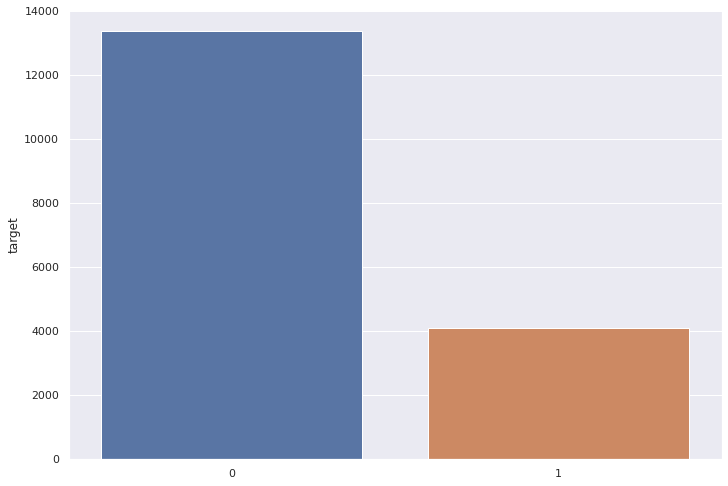

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tar_cnt = train['target'].value_counts()
print(tar_cnt)
sns.barplot(x=tar_cnt.index, y=tar_cnt)

- 0 = <=50K (5만 달러 이하) / 1 = >50K (5만 달러 초과) 
 - 소득이 5만 이하인 데이터는 5만 이상 데이터의 3배 가량. 3:1의 비율

## 범주형 데이터 분석

In [ ]:
# 순자본이익 컬럼 생성
train['net_cap'] = train['capital.gain'] - train['capital.loss']

In [ ]:
# 수치형 데이터 drop
train_cat = train.drop(['id', 'age', 'fnlwgt', 'education.num', 'net_cap', 'hours.per.week'], axis=1) 
train_cat.head()

,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,native.country,target
0,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,United-States,0
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,1
2,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,United-States,0
3,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,0,0,United-States,0
4,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,United-States,0


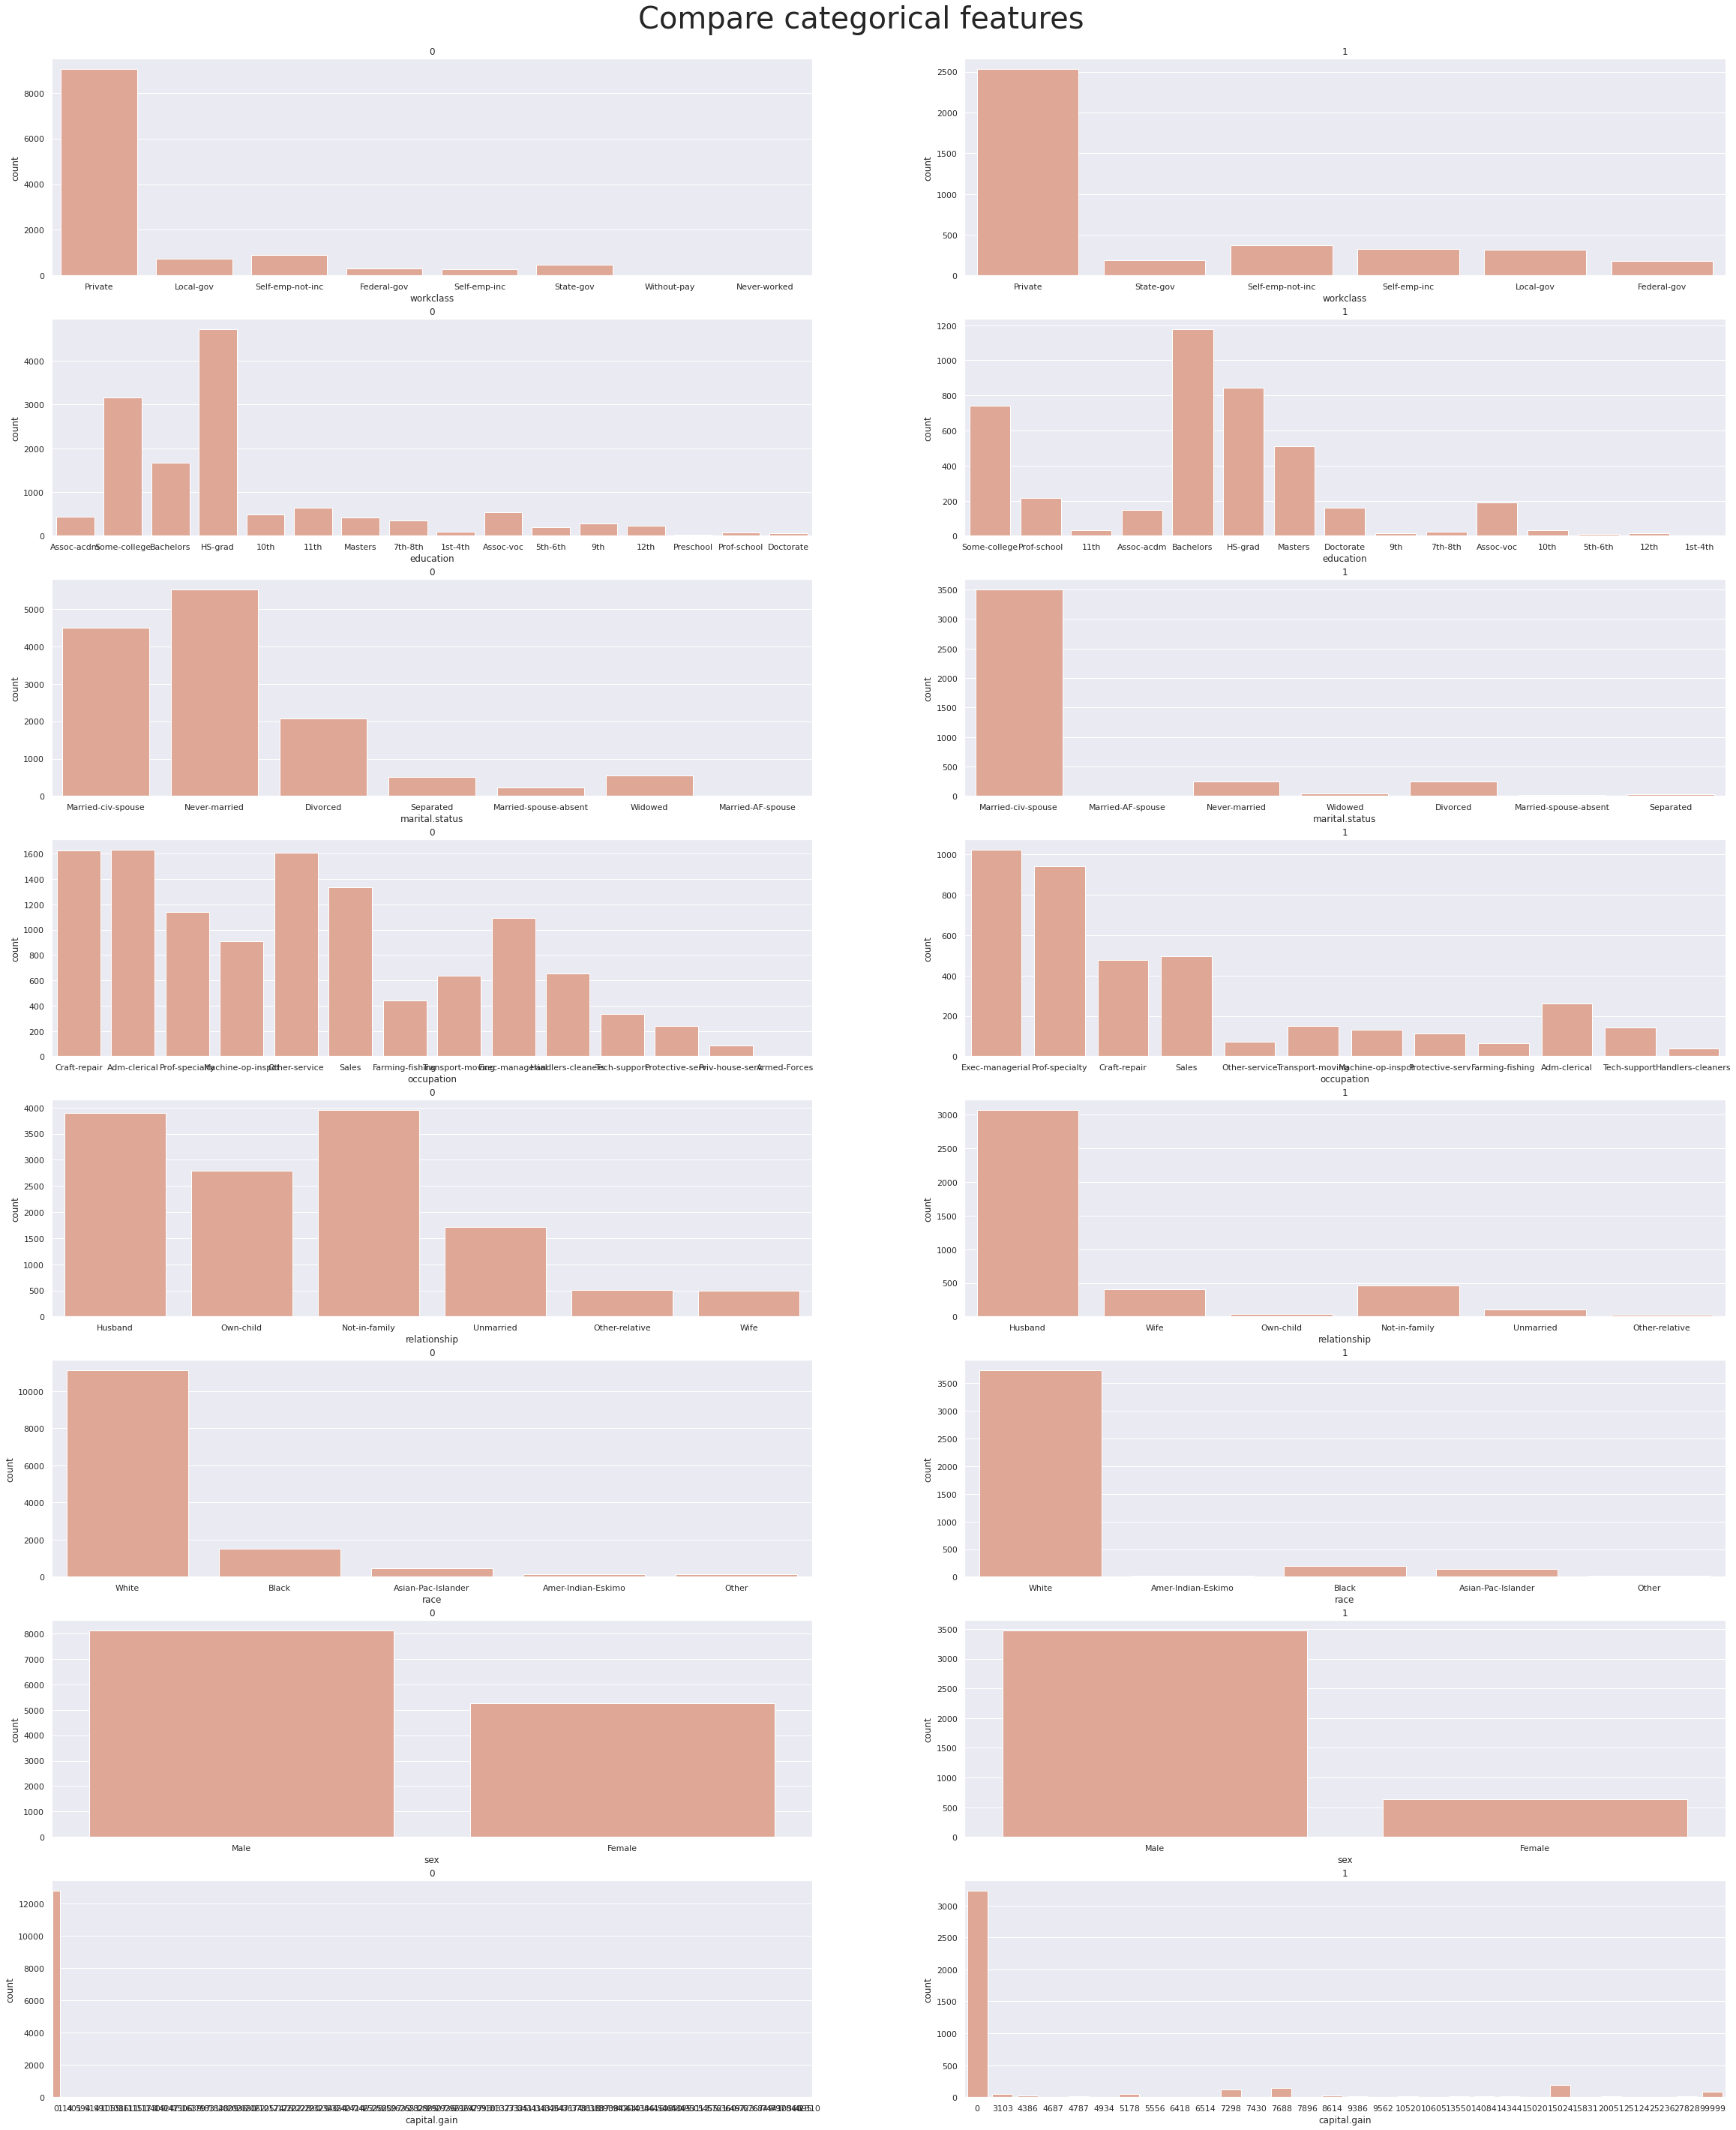

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 범주형 데이터 분포 
def visualize(axx, field, num): ##그래프를 그리기 위한 메소드
    sns.countplot(train_cat.columns[num], data= train_cat[train_cat['target'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다.
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16))  = plt.subplots(nrows=8, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<8: 
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_cat['target'].unique()[i], k)
        j = j+1
    k = k+1

*** 5만 이하는 저소득 / 5만 이상은 고소득으로 간단히 명명 ***


- WorkClass
 - 사기업 종사자가 대부분, 자영업, 지방, 주정부 순으로 많은 것을 확인

- Education
 - 저소득의 경우, 고졸 / 전문대 / 학사 순으로 많다
 - 고소득의 경우, 학사 / 고졸 / 전문대 순으로 많음
   - 교육수준이 소득과 어느정도의 연관성이 있음을 반증

- Marital Status
 - 저소득의 경우, 미혼 / 기혼 / 이혼 순
 - 고소득의 경우, 기혼 / 이혼 / 미혼 순
   - 소득이 결혼을 하는데 있어 중요한 선택지임을 나타내는 지표라는 생각이 든다

- Occupation
 - 저소득의 경우, Adm-clerical / Craft-repair / Other Service 순
 - 고소득의 경우, Exec-managerial / Prof-specialty / Sales 순
   - 연봉이 높은 직업과 낮은 직업 별로 분포가 되어있다

- Relationship
 - 저소득의 경우, Husband / Not-in-family / Own-child 순
 - 고소득의 경우, Husband / Not-in-family / Wife 순
   - 해당 지표가 가족 관계에 있어 본인을 지칭하는 것인지, 정확히 파악 안 됨

- Race
 - 저소득의 경우, White / Black / Asian-Pac-Islander 순
 - 고소득의 경우, White / Black / Asian-Pac-Islander 순
   - 고소득의 경우 타 지표에 비해 백인의 비중이 상당히 높고, 저소득의 경우 백인 이외의 지표 비중이 고소득보다 높은 양상을 보임

- Sex
 - 저소득의 경우, Male(약 7,000) / Female (약 4,500)
 - 고소득의 경우, Male(약 3,300) / Female (약 500)
   - 데이터 건수 차이도 존재하겠지만, 비율로 보았을 때 고소득의 경우 남성의 비중이 훨씬 높은 양상을 보임


## 수치형 데이터 분석

In [ ]:
train_num = train[['age', 'fnlwgt', 'net_cap', 'hours.per.week', 'target']] #수치형 피쳐와 label인 target 추출
train_num.head()

,age,fnlwgt,net_cap,hours.per.week,target
0,32,309513,0,40,0
1,33,205469,0,40,1
2,46,149949,0,40,0
3,23,193090,0,30,0
4,55,60193,0,40,0


In [ ]:
train_num.describe()

,age,fnlwgt,net_cap,hours.per.week,target
count,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.000000
mean,38.720995,1.897610e+05,992.769908,40.002460,0.234897
std,14.079617,1.049929e+05,7462.144353,12.671265,0.423947
min,17.000000,1.228500e+04,-4356.000000,1.000000,0.000000
25%,27.000000,1.181558e+05,0.000000,38.000000,0.000000
50%,37.000000,1.781340e+05,0.000000,40.000000,0.000000
75%,48.000000,2.373180e+05,0.000000,45.000000,0.000000
max,90.000000,1.455435e+06,99999.000000,99.000000,1.000000


- net_cap의 최소, 최대값은 극명한데 사분위수들에 대한 정보가 나오지 않는다
- 이상치가 존재하는지 확인 후, 이상치가 존재한다면 제거 작업 요망

## 상관도 분석

In [ ]:
wc_cnt = train[['workclass', 'education.num', 'net_cap']]
# 일 유형별 교육수준, 순자본이익 평균을 계산
wc_cnt = wc_cnt.groupby('workclass').mean()
wc_cnt

,education.num,net_cap
workclass,,
Federal-gov,10.985567,916.843299
Local-gov,11.003799,906.885090
Never-worked,7.428571,0.000000
Private,9.883904,843.034319
Self-emp-inc,11.040404,3931.102694
Self-emp-not-inc,10.213836,1900.728774
State-gov,11.427921,673.810319
Without-pay,8.666667,402.333333


- 교육 수준이 높을수록 순자본 이익이 높은 추세에 있지만 꼭 비례하지는 않는다. 의미적으로 보았을 때 Cap gain과 loss가 근로소득이 맞는지에 대한 의문점. 근로소득 이외 자본소득으로 이해한다면 소득 수준이 높기 때문에 굴릴 수 있는 케파가 커진다라고 생각되기 때문에 어느정도의 상관관계는 존재할 수 있다라고 판단

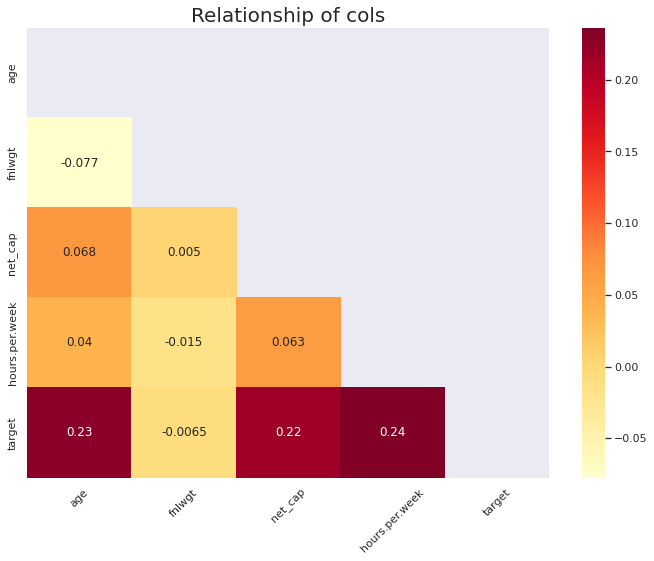

In [ ]:
import numpy as np

corr_df = train_num.corr()

# 사이즈 조정
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 절반만 표시하기 위한 mask 설정
mask=np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

ax = sns.heatmap(corr_df,
                 annot=True, # 데이터 값 표시
                 mask=mask, # 마스크 적용 표시
                 cmap='YlOrRd') # 노랑 / 오렌지 / 빨강

plt.xticks(rotation=45)
plt.title('Relationship of cols', fontsize=20)
plt.show() 

- 수치형 변수 간 상관도가 극히 낮다.
- target값과 나머지 변수들과의 선형성에서 주당 업무시간, 나이가 상관도가 비교적 높게 보임을 알 수 있고, 오히려 인구조사 가중치가 가장 낮게 나왔다.

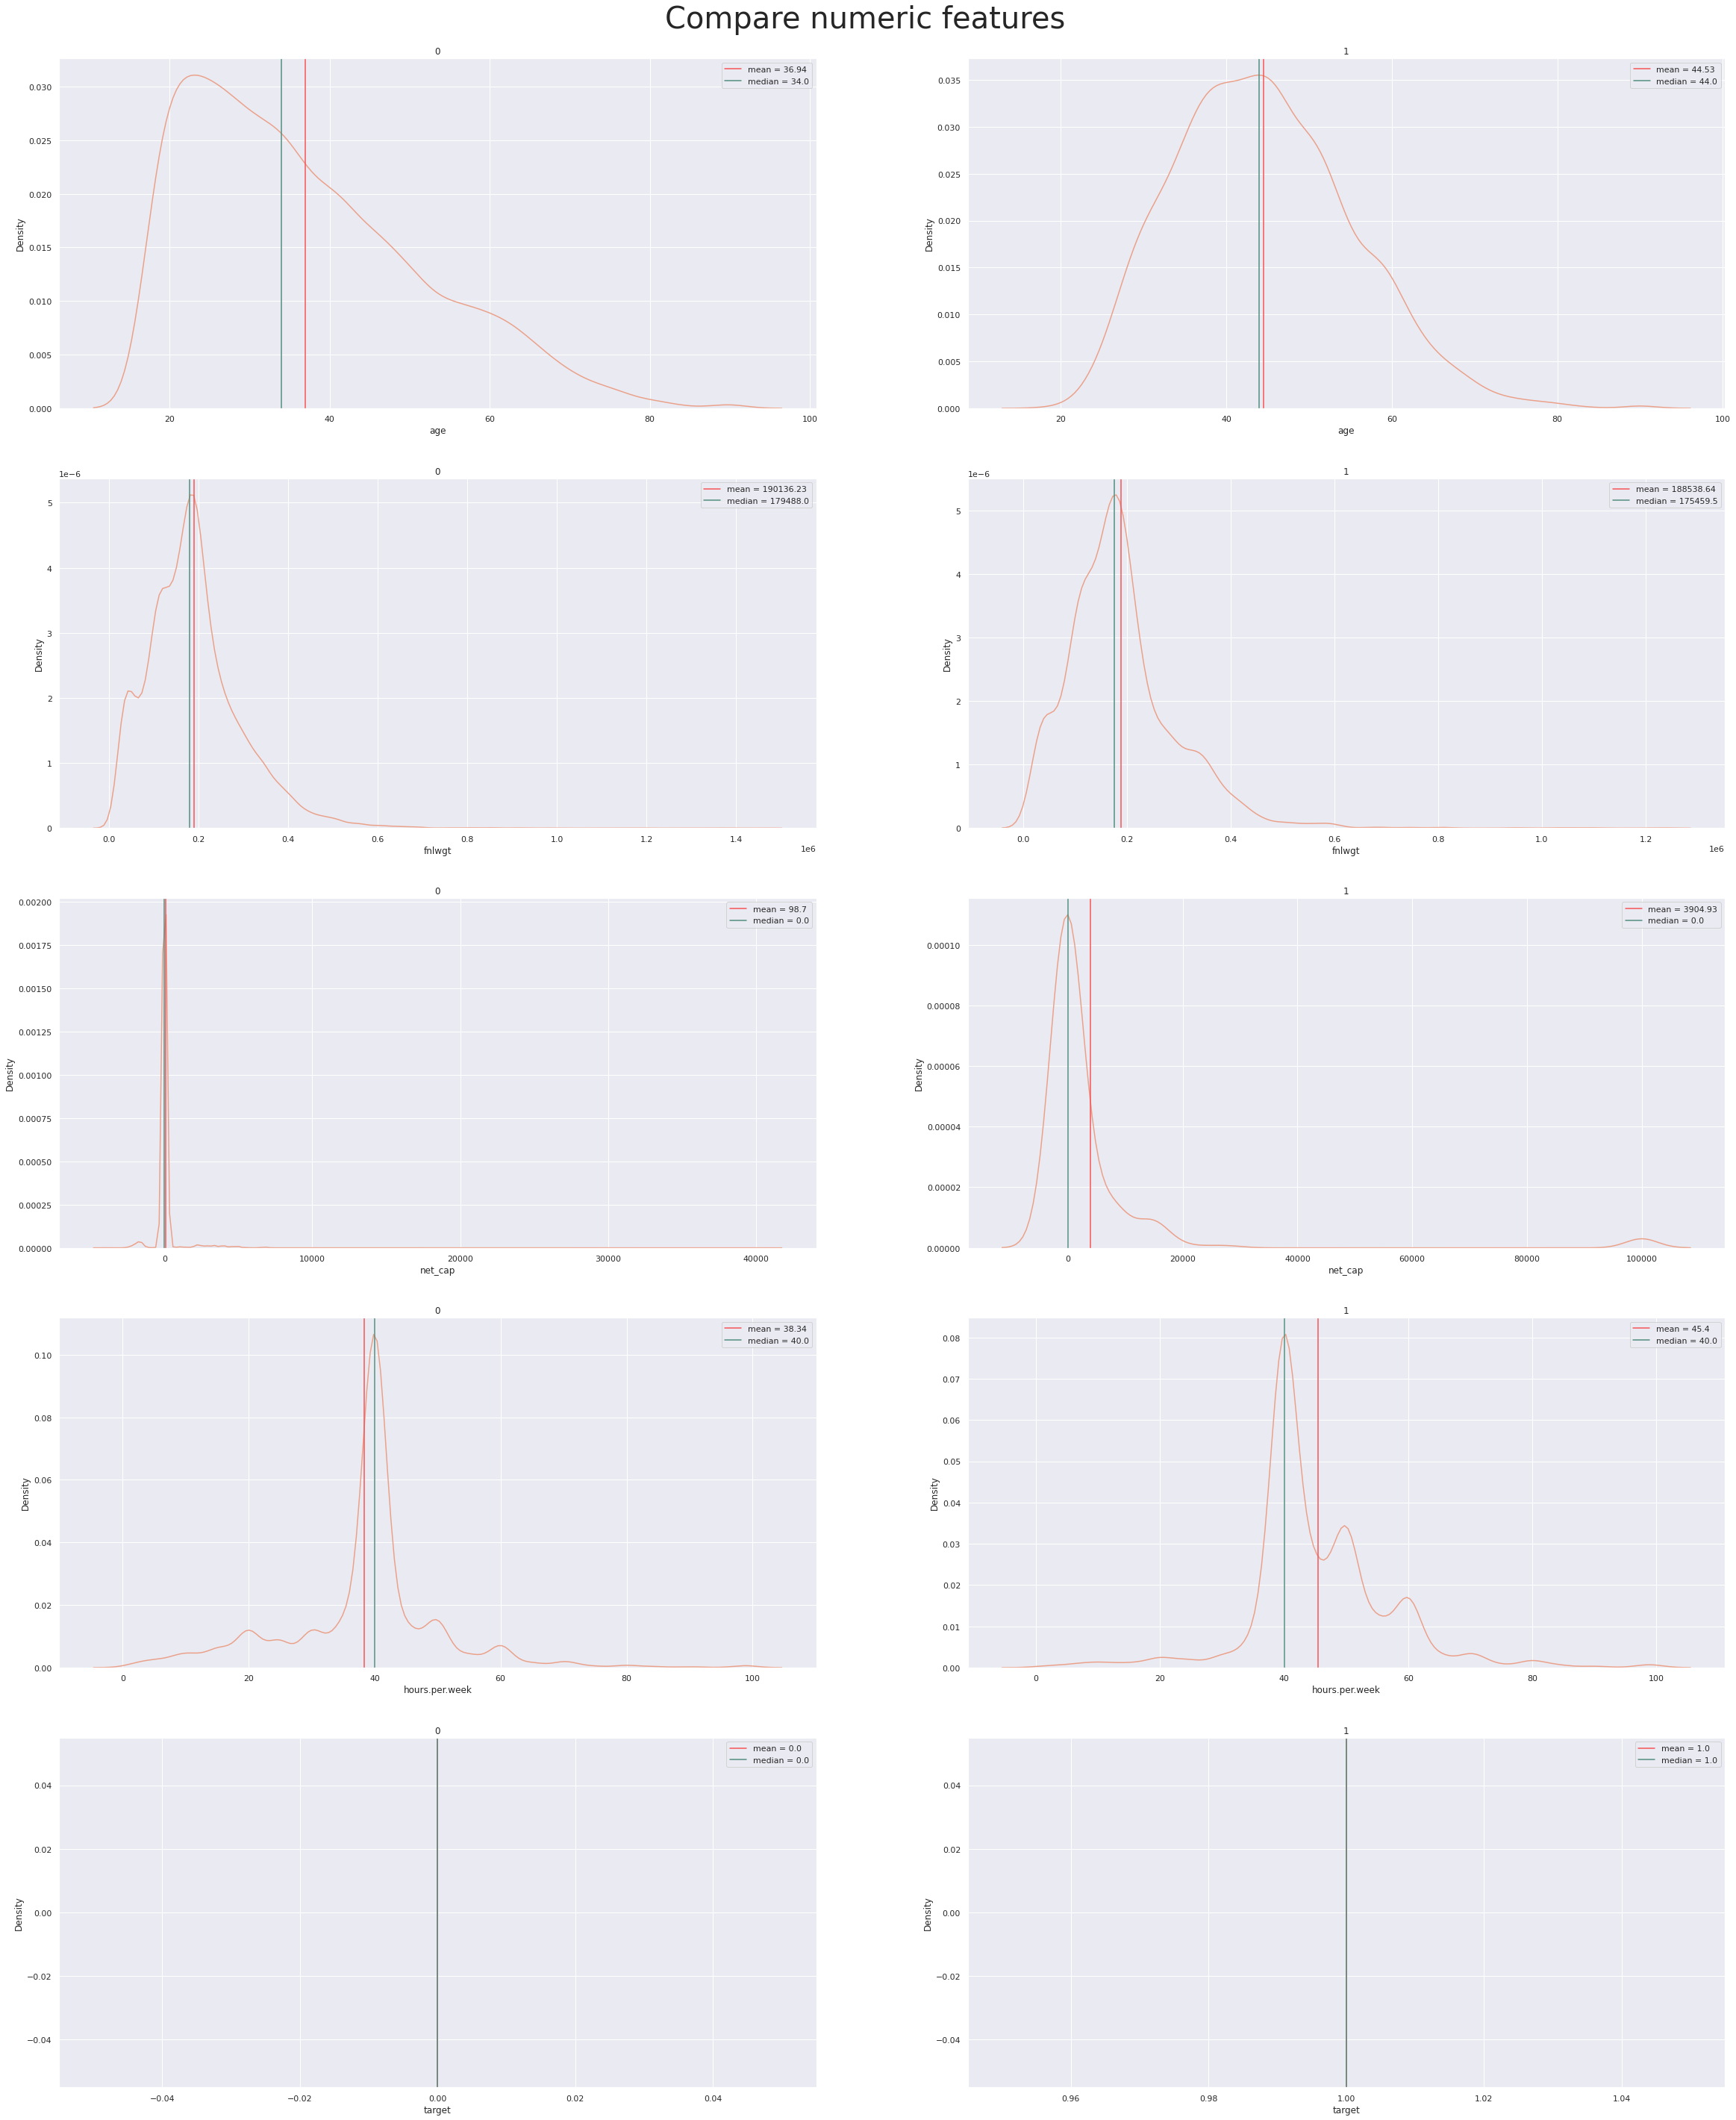

In [ ]:
# 수치형 데이터 분포 
def visualize(axx, field, num):
    line = train_num[train_num['target'] == field] #메소드에서 target 클래스 추춣
    name = train_num[train_num['target'] == field][train_num.columns[num]].name #메소드에서 이름 추출
    sns.kdeplot(x = line[train_num.columns[num]],  data = train_num, ax = axx, color='#eaa18a') #countplot을 이용하여 그래프를 그려줍니다.
    axx.axvline(line.describe()[name]['mean'], c='#f55354', label = f"mean = {round(line.describe()[name]['mean'], 2)}") #mean 통계값을 표기해줍니다.
    axx.axvline(line.describe()[name]['50%'], c='#518d7d', label = f"median = {round(line.describe()[name]['50%'], 2)}") #median 통계값을 표기해줍니다.
    axx.legend()
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10))  = plt.subplots(nrows=5, ncols=2) ##원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare numeric features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<5:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_num['target'].unique()[i], k)
        j = j+1
    k = k+1

- Age
 - 저소득
   - 20대에서 40대사이 주로 분포하는 것으로 확인
 - 고소득
   - 주로 30대 후반 ~ 50대 사이 분포하는 것으로 확인
 - 평균적으로 소득이 가장 많을 연령대가 4~50대이기 때문

- fnlwgt
 - 가중치의 양상이 저소득과 고소득 간 분포가 비슷한데, 해당 가중치의 기준이 정확히 무엇인지 모르겠다

- net_cap (cap.gain - cap.loss)
 - 저소득
   - 평균 98로 분산이 크게 적은 정규분포 그래프 형태를 띈다
 - 고소득
   - 평균 3779로 저소득 대비 보다 넓은 분포를 보임

- hours.per.week
 - 고소득이 비교적 높은 주당 업무시간을 소요. 
 - 저소득의 경우 주 40시간을 기준으로 주로 분포, 고소득의 경우에는 40시간 이상에도 어느정도 밀집군을 형성하고 있는 것으로 확인

- 정규분포의 형태를 띄는 변수들도 있지만, 치우쳐져 있는 변수들이 많다. 정규화를 할 때 고려해야 할 듯.


# 이상치 제거

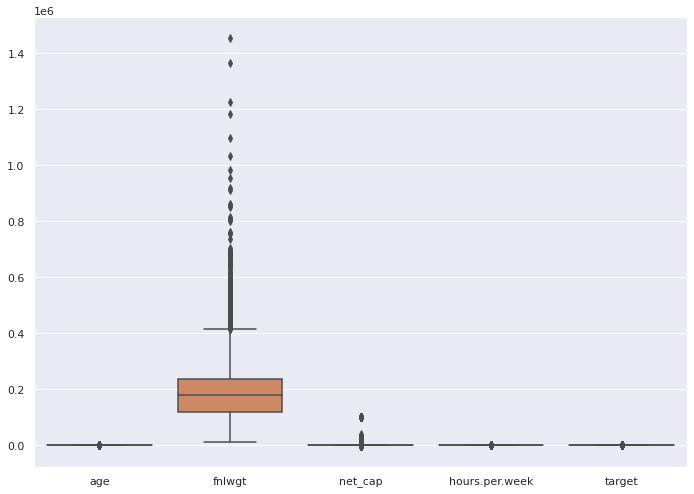

In [ ]:
sns.boxplot(data=train_num)
plt.show()

- 인구조사가중치와 순자본이익에 대한 outlier가 어느정도 존재.
- age와 hours.per.week의 경우 이상치가 미미하고 영향을 별로 미치지 않을 것으로 판단. 
- fnlwgt와 netcap의 이상치만 제거하기로 결정

In [ ]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return np.where((data > upper_bound)|(data < lower_bound))

In [ ]:
import numpy as np

print('이상치 제거 전 개수 : ', len(train))
fnlwgt_ol_idx = outliers_iqr(train['fnlwgt'])[0]
net_cap_ol_idx = outliers_iqr(train['net_cap'])[0]

tt_ol_idx = np.concatenate((
    net_cap_ol_idx,
    fnlwgt_ol_idx,
), axis=None)

tt_no_ol_idx = []

for i in train.index:

    # tt_ol_idx에 포함 아니면 추가
    if i not in tt_ol_idx:
        tt_no_ol_idx.append(i)

train = train.loc[tt_no_ol_idx]
train = train.reset_index(drop=True)
print('이상치 제거 후 개수 : ', len(train))

이상치 제거 전 개수 :  17480
이상치 제거 후 개수 :  14787


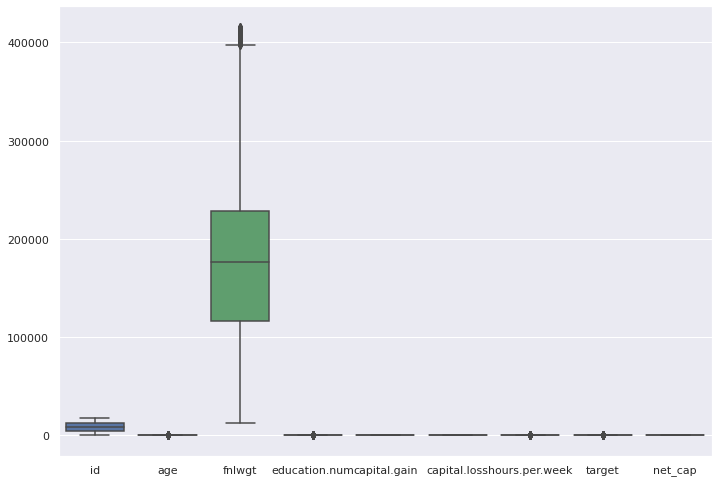

In [ ]:
# 이상치 제거 후
sns.boxplot(data=train)
plt.show()

- 이상치가 어느정도 제거된 양상을 보임

# 데이터 전처리

In [ ]:
def preprocessing_train(df):

    
    # 결측치 일괄 제거
    df.dropna(inplace=True, axis=0)
    
    # 불용 및 상관관계가 낮다고 생각되는 columns 제거
    df.drop(['id', 'capital.gain', 'capital.loss', 'fnlwgt', 'native.country'], inplace=True, axis=1)

    # columns 순서 변경
    df = df[['age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'hours.per.week', 'net_cap', 'target']]

    # 결혼 상태 - 기혼 / 미혼으로 변경
    df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent', 'Separated'], 'Not-alone', inplace=True)
    df['marital.status'].replace(['Never-married', 'Divorced', 'Widowed'], 'Alone', inplace=True)
    # 교육 수준 - 고졸 / 전문대 / 대졸 학사 / 석박사
    df['education'].replace(['7th-8th', '1st-4th', '10th', '11th', '5th-6th', '9th', '12th', 'Preschool' 'HS-grad'], 'Under_HS', inplace=True)
    df['education'].replace(['Assoc-acdm', 'Some-college', 'Assoc-voc'], 'Jr_college', inplace=True)
    df['education'].replace(['Bachelors', 'Doctorate', 'Prof-school', 'Masters'], 'Over_college', inplace=True)
    # 가족관계 - 결혼 유무로 변경
    df['relationship'].replace(['Husband', 'Wife', 'Own-child'], 'Married', inplace=True)
    df['relationship'].replace(['Not-in-family', 'Unmarried', 'Other-relative'], 'Not married', inplace=True)
    # 일 유형 - 노 페이, 일 경험 없음을 other로 분류
    df['workclass'].replace(['Without-pay', 'Never-worked'], 'other', inplace=True)
    # 직업군을 n차 산업별로 분류 - 번역이 안 되는 몇몇 값의 경우 임의로 배정
    df['occupation'].replace(['Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 'Transport-moving', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv'], 'Pri_ind', inplace=True)
    df['occupation'].replace(['Tech-support', 'Sales', 'Craft-repair', 'Protective-serv', 'Armed-Forces'], 'sec_ind', inplace=True)
    df['occupation'].replace(['Prof-specialty', 'Exec-managerial'], 'ter_ind', inplace=True)

    return df

def preprocessing_test(df):
    # 순자본이익 컬럼 생성
    df['net_cap'] = df['capital.gain'] - df['capital.loss']
    # 결혼 상태 - 기혼 / 미혼으로 변경
    df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent', 'Separated'], 'Not-alone', inplace=True)
    df['marital.status'].replace(['Never-married', 'Divorced', 'Widowed'], 'Alone', inplace=True)
    # 교육 수준 - 고졸 / 전문대 / 대졸 학사 / 석박사
    df['education'].replace(['7th-8th', '1st-4th', '10th', '11th', '5th-6th', '9th', '12th', 'Preschool' 'HS-grad'], 'Under_HS', inplace=True)
    df['education'].replace(['Assoc-acdm', 'Some-college', 'Assoc-voc'], 'Jr_college', inplace=True)
    df['education'].replace(['Bachelors', 'Doctorate', 'Prof-school', 'Masters'], 'Over_college', inplace=True)
    # 가족관계 - 결혼 유무로 변경
    df['relationship'].replace(['Husband', 'Wife', 'Own-child'], 'Married', inplace=True)
    df['relationship'].replace(['Not-in-family', 'Unmarried', 'Other-relative'], 'Not married', inplace=True)
    # 일 유형 - 노 페이, 일 경험 없음을 other로 분류
    df['workclass'].replace(['Without-pay', 'Never-worked'], 'other', inplace=True)
    # 직업군을 n차 산업별로 분류 - 번역이 안 되는 몇몇 값의 경우 임의로 배정
    df['occupation'].replace(['Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 'Transport-moving', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv'], 'Pri_ind', inplace=True)
    df['occupation'].replace(['Tech-support', 'Sales', 'Craft-repair', 'Protective-serv', 'Armed-Forces'], 'sec_ind', inplace=True)
    df['occupation'].replace(['Prof-specialty', 'Exec-managerial'], 'ter_ind', inplace=True)


    # 결측치 일괄 제거
    df.dropna(inplace=True, axis=0)
    
    # 불용 및 상관관계가 낮다고 생각되는 columns 제거
    df.drop(['id', 'capital.gain', 'capital.loss', 'fnlwgt', 'native.country'], inplace=True, axis=1)


    return df

In [ ]:
train = preprocessing_train(train)

# One-hot Encoding

In [ ]:
train = pd.get_dummies(train)
train.head()

,age,education.num,hours.per.week,net_cap,target,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_ter_ind,relationship_Married,relationship_Not married,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,32,12,40,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,33,10,40,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,1
2,46,10,40,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3,23,13,30,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
4,55,9,40,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


> 레이블 인코딩의 문제점  
- 일괄적인 숫자 값으로 변환되면서 예측 성능이 떨어질 수 있다.  
-  숫자의 크고 작음에 대한 특성이 작용
 - 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함   
(트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 괜찮음)

- 일반적으로 Label Encoding의 경우, 숫자의 크고 작음에 대한 특성이 작용하기 때문에 보통 ML 회귀모델에서 잘 쓰이지 않는다고 한다. 때문에 가볍게 적용할 수 있는 One-hot encoding을 진행했다.


# 변수 및 모델 정리

In [ ]:
X = train.drop(['target'], axis=1)
y = train['target']
print(X.shape, y.shape)

(12721, 30) (12721,)


## 정규화

- 어떠한 Scaler를 써야될 지 고민이 많았다.
- 여러 자료들을 참고해보았을 때, Standard가 적합하다는 생각이 들었다. 이전 교육을 들으면서 회귀분석을 할 때에도 MinMax와 Standard를 함께 써서 비교를 했었는데 그 당시에는 두 가지가 차이가 나지 않았다. (정제를 잘 한 탓일까)
무튼, 이상치에 민감한 정규화기 때문에 일단 제거는 했지만 최대한 표준화된 Standard와 Robust를 사용해 두 가지를 비교해보기로 했다.

> 변환 분포를 살펴보면 StandardScaler와 RobustScaler의 변환된 결과가 대부분 표준화된 유사 형태의 데이터 분포로 반환된다.  
MinMaxScaler특정값에 집중되어 있는 데이터가 그렇지 않은 데이터 분포보다 1표준편차에 의한 스케일 변화값이 커지게 된다.  
한쪽으로 쏠림 현상이 있는 데이터 분포는 형태가 거의 유지된채 범위값이 조절되는 결과를 보인다.  
MaxAbsScaler의 경우, MinMaxScaler와 유사하나 음수와 양수값에 따른 대칭 분포를 유지하게 되는 특징이 있다.  
그리고 마지막 이미지를 통해 살펴보면, 대부분의 스케일링 기법에서 아웃라이어는 변환 효과를 저해하는 요소임이 드러난다.  
유의해야할 점은, 스케일링시 Feature별로 크기를 유사하게 만드는 것은 중요하지만, 그렇다고 모든 Feature의 분포를 동일하게 만들 필요는 없다.  
특성에 따라 어떤 항목은 원본데이터의 분포를 유지하는 것이 유의할 수 있다. 예로 데이터가 거의 한 곳에 집중되어 있는 Feature를 표준화시켜 분포를 같게 만들었을때 작은 단위의 변화가 큰 차이를 나타내는 것으로 반영될 수 있기 때문이다.  
출처 : https://mkjjo.github.io/python/2019/01/10/scaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit(X))
train_std = standardScaler.transform(X)

StandardScaler()


In [ ]:
from sklearn.model_selection import train_test_split                                                     

X_train, X_valid, y_train, y_valid = train_test_split(train_std, 
                                                      y, 
                                                      test_size=0.2, 
                                                      random_state=42)

# 모델 성능 확인

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# 모델 선언
model_lgr = LogisticRegression(solver='liblinear', random_state=0)

# 모델 학습
model_lgr.fit(X_train, y_train)
pred = model_lgr.predict(X_valid)
score_lgr = accuracy_score(y_valid, pred)
f1_lgr = f1_score(y_valid, pred)

print(f"LogisticRegression 모델의 정확도는 {score_lgr*100:.2f}% 입니다")
print(f"LogisticRegression 모델의 f1 score는 {f1_lgr*100:.2f}% 입니다")

LogisticRegression 모델의 정확도는 84.01% 입니다
LogisticRegression 모델의 f1 score는 52.06% 입니다


- 두 Scaler 정확도에서는 차이가 나지 않는다. 데이터 컬럼의 유형에 따라 차이가 날 수도 있을거란 생각이 든다. 4가지 정규화 유형에 대해 학습할 필요가 있어 보인다.
- 또한 데이콘에 올라온 예제 코드에서는 원핫인코딩이 아닌 라벨 인코딩을 진행했고, 이상치 제거를 하지 않아서인지 미미한 차이긴 하지만 1% 정도 정확도에서 차이를 보이는 것 같다


# 앙상블 모델 테스트

- 경험상 여러 모델을 사용해서 순위를 매겨보면, 앙상블의 성능이 대부분 우수하게 나왔다. 주로 점수가 높았던 모델을 추려 정확도를 확인

# XGBoost

In [ ]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore')

xgb_cfr = XGBClassifier(random_state=0)
xgb_cfr.fit(X_train, y_train)

pred = xgb_cfr.predict(X_valid)
score_xgb = accuracy_score(y_valid, pred)
f1_xgb = f1_score(y_valid, pred)

print(f'XGBClassifier Accuracy : {score_xgb*100:.2f}')
print(f'XGBClassifier f1 score : {f1_xgb*100:.2f}')

XGBClassifier Accuracy : 85.19
XGBClassifier f1 score : 55.59


# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_cfr = DecisionTreeClassifier(random_state=0)
dt_cfr.fit(X_train, y_train)

pred = dt_cfr.predict(X_valid)
score_dt = accuracy_score(y_valid, pred)
f1_dt = f1_score(y_valid, pred)

print(f'DecisionTreeClassifier Accuracy : {score_dt*100:.2f}')
print(f'DecisionTreeClassifier f1 score : {f1_dt*100:.2f}')

DecisionTreeClassifier Accuracy : 79.49
DecisionTreeClassifier f1 score : 48.11


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cfr = RandomForestClassifier(random_state=0)
rf_cfr.fit(X_train, y_train)

pred = rf_cfr.predict(X_valid)
score_rf = accuracy_score(y_valid, pred)
f1_rf = f1_score(y_valid, pred)

print(f'RandomForestClassifier Accuracy : {score_rf*100:.2f}')
print(f'RandomForestClassifier f1 score : {f1_rf*100:.2f}')

RandomForestClassifier Accuracy : 82.71
RandomForestClassifier f1 score : 52.89


# SVC

In [ ]:
from sklearn.svm import SVC

svm_cfr = SVC(kernel="linear", probability=True, random_state=0)
svm_cfr.fit(X_train, y_train)

pred = svm_cfr.predict(X_valid)
score_svc = accuracy_score(y_valid, pred)
f1_svc = f1_score(y_valid, pred)

print(f'SoftVectorMachine Accuracy : {score_svc*100:.2f}')
print(f'SoftVectorMachine f1 score : {f1_svc*100:.2f}')

SoftVectorMachine Accuracy : 82.99
SoftVectorMachine f1 score : 45.53


## GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbr_cfr = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

pred = gbr_cfr.predict(X_valid)
score_gbr = accuracy_score(y_valid, pred)
f1_gbr = f1_score(y_valid, pred)

print(f'GradientBoostingClassifier Accuracy : {score_gbr*100:.2f}')
print(f'GradientBoostingClassifier f1 score : {f1_gbr*100:.2f}')

GradientBoostingClassifier Accuracy : 84.83
GradientBoostingClassifier f1 score : 55.22


# LGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb_cfr = LGBMClassifier(n_estimators=1000, random_state=0)
lgb_cfr.fit(X_train, y_train)

pred = lgb_cfr.predict(X_valid)
score_lgb = accuracy_score(y_valid, pred)
f1_lgb = f1_score(y_valid, pred)

print(f'LGBMClassifier Accuracy : {score_lgb*100:.2f}')
print(f'LGBMClassifier f1 score : {f1_lgb*100:.2f}')

LGBMClassifier Accuracy : 82.48
LGBMClassifier f1 score : 53.54


# KNeightborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_cfr = KNeighborsClassifier()
kn_cfr.fit(X_train, y_train)

pred = kn_cfr.predict(X_valid)
score_kn = accuracy_score(y_valid, pred)
f1_kn = f1_score(y_valid, pred)

print(f'KNeighborsClassifier Accuracy : {score_kn*100:.2f}')
print(f'KNeighborsClassifier f1 score : {f1_kn*100:.2f}')

KNeighborsClassifier Accuracy : 82.08
KNeighborsClassifier f1 score : 51.90


# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_cfr = AdaBoostClassifier()
ab_cfr.fit(X_train, y_train)

pred = ab_cfr.predict(X_valid)
score_ab = accuracy_score(y_valid, pred)
f1_ab = f1_score(y_valid, pred)

print(f'AdaBoostClassifier Accuracy : {score_ab*100:.2f}')
print(f'AdaBoostClassifier f1 score : {f1_ab*100:.2f}')

AdaBoostClassifier Accuracy : 83.93
AdaBoostClassifier f1 score : 52.28


# RidgeClassifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

rd_cfr = RidgeClassifier(random_state=0,)
rd_cfr.fit(X_train, y_train)

pred = rd_cfr.predict(X_valid)
score_rd = accuracy_score(y_valid, pred)
f1_rd = f1_score(y_valid, pred)

print(f'RidgeClassifier Accuracy : {score_rd*100:.2f}')
print(f'RidgeClassifier f1 score : {f1_rd*100:.2f}')

RidgeClassifier Accuracy : 83.50
RidgeClassifier f1 score : 43.85


# BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

bg_cfr = BaggingClassifier(random_state=0)
bg_cfr.fit(X_train, y_train)

pred = bg_cfr.predict(X_valid)
score_bg = accuracy_score(y_valid, pred)
f1_bg = f1_score(y_valid, pred)

print(f'BaggingClassifier Accuracy : {score_bg*100:.2f}')
print(f'BaggingClassifier f1 score : {f1_bg*100:.2f}')

BaggingClassifier Accuracy : 81.89
BaggingClassifier f1 score : 50.91


# ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_cfr = ExtraTreesClassifier(random_state=0)
et_cfr.fit(X_train, y_train)

pred = et_cfr.predict(X_valid)
score_et = accuracy_score(y_valid, pred)
f1_et = f1_score(y_valid, pred)

print(f'ExtraTreesClassifier Accuracy : {score_et*100:.2f}')
print(f'ExtraTreesClassifier f1 score : {f1_et*100:.2f}')

ExtraTreesClassifier Accuracy : 82.24
ExtraTreesClassifier f1 score : 51.81


# 모델 별 정확도

In [ ]:
model_lst = [model_lgr, xgb_cfr, dt_cfr, rf_cfr, svm_cfr, gbr_cfr, lgb_cfr, kn_cfr, ab_cfr, rd_cfr, bg_cfr, et_cfr]

for model in model_lst:
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    class_name = model.__class__.__name__
    print(f'{class_name} 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')
    print(f'{class_name} f1 score : {(f1_score(y_valid, pred))*100:.2f}%')
    print('-------------------------------------------------------------------')

LogisticRegression 정확도 : 84.01%
LogisticRegression f1 score : 52.06%
-------------------------------------------------------------------
XGBClassifier 정확도 : 85.19%
XGBClassifier f1 score : 55.59%
-------------------------------------------------------------------
DecisionTreeClassifier 정확도 : 79.49%
DecisionTreeClassifier f1 score : 48.11%
-------------------------------------------------------------------
RandomForestClassifier 정확도 : 82.71%
RandomForestClassifier f1 score : 52.89%
-------------------------------------------------------------------
SVC 정확도 : 82.99%
SVC f1 score : 45.53%
-------------------------------------------------------------------
GradientBoostingClassifier 정확도 : 84.83%
GradientBoostingClassifier f1 score : 55.22%
-------------------------------------------------------------------
LGBMClassifier 정확도 : 82.48%
LGBMClassifier f1 score : 53.54%
-------------------------------------------------------------------
KNeighborsClassifier 정확도 : 82.08%
KNeighborsClassifier f1

In [ ]:
max_dict = {'model_lgr' : score_lgr, 
            'XGBoost' : score_xgb, 
            'DecisionTree' : score_dt, 
            'RandomForest' : score_rf, 
            'SVC' : score_svc, 
            'GradientBoosting' : score_gbr, 
            'LGBM' : score_lgb,
            'KNeighbor' : score_kn,
            'AdaBoost' : score_ab,
            'Ridge' : score_rd,
            'Bagging' : score_bg,
            'ExtraTree' : score_et}
max_model = max(max_dict, key=max_dict.get)
max_lst = [score_lgr, score_xgb, score_dt, score_rf, score_svc, score_gbr, score_lgb, score_kn, score_ab, score_rd, score_bg, score_et]
max_f1 = [f1_lgr, f1_xgb, f1_dt, f1_rf, f1_svc, f1_gbr, f1_lgb, f1_kn, f1_ab, f1_rd, f1_bg, f1_et]



print('--------------------------------------------------------------------------------')
print(f'가장 정확도가 높은 모델은 {max_model}이고, 정확도는 {max(max_lst)*100:.2f}, f1 score는 {max(max_f1)*100:.2f}입니다.')
print('--------------------------------------------------------------------------------')

--------------------------------------------------------------------------------
가장 정확도가 높은 모델은 XGBoost이고, 정확도는 85.19, f1 score는 55.59입니다.
--------------------------------------------------------------------------------


- 정확도 상관없이 모든 모델을 Voting에 넣으면 오히려 정확도가 떨어지는 양상 확인
- 정확도 상위권 5개만을 voting
- voting 기법 (Hard / Soft / Weights) 중 정확도가 높은 모델에 더 높은 가중치를 부여하는 기법이 가장 정확도가 높음

# GridSearchCV / RandomSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

          # 결정 트리의 개수를 지정. 적절한 개수 설정이 중요
params = { 'n_estimators' : [80, 90, 100, 110, 120],
          # 트리의 깊이. 랜덤 포레스트 트리의 루트 노드와 리프 노드 사이 가장 긴 경로 설정
          # 모든 트리가 성장할 수 있는 깊이를 제한
           'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
          # 최상의 분할을 찾을 때 고려해야 할 기능의 수
           'learning_rate' : [0.01, 0.1],
          # 자식에 필요한 인스턴스 가중치(hessian)의 최소 합계
           'min_child_weight' : [1, 2, 3, 4]
            }


xgb_cfr = XGBClassifier(random_state=0,
                        n_jobs=-1)
grid_cv = GridSearchCV(xgb_cfr, 
                       param_grid = params, 
                       cv = 5, 
                       n_jobs = -1,
                       verbose=3)
grid_cv.fit(X_train, y_train)

print(f'최적 하이퍼 파라미터: {grid_cv.best_params_}')
print(f'최고 예측 정확도: {(grid_cv.best_score_)*100:.4f}')

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
최적 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 80}
최고 예측 정확도: 84.9548


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_depth' : randint(low=3, high=100),
    'min_child_weight' : randint(low=1, high=100),
    # 'learning_rate' : randint(low=0.01, high=0.1),
}

xgb_cfr = XGBClassifier(random_state=0,
                        n_jobs=-1)
rand_cv = RandomizedSearchCV(xgb_cfr, 
                            param_distributions=param_distribs,
                            cv = 5, 
                            n_jobs = -1,
                            verbose=3)
rand_cv.fit(X_train, y_train)

print(f'최적 하이퍼 파라미터: {rand_cv.best_params_}')
print(f'최고 예측 정확도: {(rand_cv.best_score_)*100:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
최적 하이퍼 파라미터: {'max_depth': 4, 'min_child_weight': 80, 'n_estimators': 101}
최고 예측 정확도: 84.8467


# Voting (Soft / Hard / Weights)

In [ ]:
from sklearn.ensemble import VotingClassifier

vo_cfr_soft = VotingClassifier(estimators = [
                                            #  ('LR', model_lgr), 
                                            ('XGB', xgb_cfr), 
                                            # ('DT', dt_cfr),
                                            # ('RF', rf_cfr),
                                            # ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),],
                                            # ('LGBM', lgb_cfr),
                                            # ('KN', kn_cfr),
                                            # ('AB', ab_cfr),],
                                            # ('RD', rd_cfr),
                                            # ('BG', bg_cfr),
                                            # ('ET', et_cfr)],
                                            voting='soft')
vo_cfr_soft.fit(X_train, y_train)
pred = vo_cfr_soft.predict(X_valid)
print(f'SoftVoting 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')
print(f'SoftVoting f1_score : {(f1_score(y_valid, pred))*100:.2f}%')

SoftVoting 정확도 : 85.03%
SoftVoting f1_score : 55.44%


In [ ]:
from sklearn.ensemble import VotingClassifier

vo_cfr_hard = VotingClassifier(estimators = [('LR', model_lgr), 
                                            ('XGB', xgb_cfr), 
                                            # ('DT', dt_cfr),
                                            # ('RF', rf_cfr),
                                            # ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),],
                                            # ('LGBM', lgb_cfr),
                                            # ('KN', kn_cfr),
                                            # ('AB', ab_cfr),
                                            # ('RD', rd_cfr),
                                            # ('BG', bg_cfr),
                                            # ('ET', et_cfr)],
                                        voting='hard')
vo_cfr_hard.fit(X_train, y_train)
pred = vo_cfr_hard.predict(X_valid)
print(f'HardVoting 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')
print(f'HardVoting f1_score : {(f1_score(y_valid, pred))*100:.2f}%')

HardVoting 정확도 : 84.95%
HardVoting f1_score : 55.31%


In [ ]:
from sklearn.ensemble import VotingClassifier

vo_cfr_wgt = VotingClassifier(estimators = [('LR', model_lgr), 
                                            ('XGB', xgb_cfr), 
                                            # ('DT', dt_cfr),
                                            # ('RF', rf_cfr),
                                            # ('SVC', svm_cfr),
                                            ('GBR', gbr_cfr),],
                                            # ('LGBM', lgb_cfr),
                                            # ('KN', kn_cfr),
                                            # ('AB', ab_cfr),],
                                            # ('RD', rd_cfr),
                                            # ('BG', bg_cfr),
                                            # ('ET', et_cfr)],
                                            voting='soft',
                                            weights=[1, 20, 10])

vo_cfr_wgt.fit(X_train, y_train)
pred = vo_cfr_wgt.predict(X_valid)
print(f'SoftVoting wgt 정확도 : {(accuracy_score(y_valid, pred))*100:.2f}%')
print(f'SoftVoting wgt f1_score : {(f1_score(y_valid, pred))*100:.2f}%')

SoftVoting wgt 정확도 : 84.95%
SoftVoting wgt f1_score : 54.99%


- Random state 지정에 따라 점수 순위가 조금씩 변동이 있음
- Random state = 0 으로 지정 시 결과
    - Soft Voting(85.38%)의 결과가 가장 높게 나옴
    - 가중치 부여 방법이 가장 잘 나올 것으로 예상했는데, 약간 예상과는 다른 순
    - Soft > Weights > Hard

In [ ]:
# for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
#     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

## Test 데이터에도 적용

- Test 데이터도 컬럼 drop과 원핫 인코딩을 함께 진행해줍니다

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              15081 non-null  int64 
 1   age             15081 non-null  int64 
 2   workclass       15081 non-null  object
 3   fnlwgt          15081 non-null  int64 
 4   education       15081 non-null  object
 5   education.num   15081 non-null  int64 
 6   marital.status  15081 non-null  object
 7   occupation      15081 non-null  object
 8   relationship    15081 non-null  object
 9   race            15081 non-null  object
 10  sex             15081 non-null  object
 11  capital.gain    15081 non-null  int64 
 12  capital.loss    15081 non-null  int64 
 13  hours.per.week  15081 non-null  int64 
 14  native.country  15081 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.7+ MB


In [ ]:
test = preprocessing_test(test)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,net_cap
0,47,Private,Jr_college,10,Not-alone,ter_ind,Married,White,Male,45,0
1,34,Self-emp-inc,Jr_college,10,Alone,sec_ind,Not married,White,Male,75,0
2,31,Local-gov,Over_college,13,Alone,sec_ind,Not married,White,Male,40,8614
3,28,Private,Over_college,13,Not-alone,ter_ind,Married,White,Male,55,0
4,54,Local-gov,Jr_college,10,Alone,Pri_ind,Not married,White,Female,40,0
...,...,...,...,...,...,...,...,...,...,...,...
15076,30,Local-gov,Jr_college,10,Not-alone,sec_ind,Married,White,Male,40,15024
15077,39,Private,Over_college,13,Not-alone,sec_ind,Married,White,Male,40,0
15078,48,Private,Under_HS,7,Alone,Pri_ind,Not married,White,Male,40,0
15079,44,Private,HS-grad,9,Not-alone,Pri_ind,Married,Amer-Indian-Eskimo,Male,40,0


In [ ]:
test

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,net_cap
0,47,Private,Jr_college,10,Not-alone,ter_ind,Married,White,Male,45,0
1,34,Self-emp-inc,Jr_college,10,Alone,sec_ind,Not married,White,Male,75,0
2,31,Local-gov,Over_college,13,Alone,sec_ind,Not married,White,Male,40,8614
3,28,Private,Over_college,13,Not-alone,ter_ind,Married,White,Male,55,0
4,54,Local-gov,Jr_college,10,Alone,Pri_ind,Not married,White,Female,40,0
...,...,...,...,...,...,...,...,...,...,...,...
15076,30,Local-gov,Jr_college,10,Not-alone,sec_ind,Married,White,Male,40,15024
15077,39,Private,Over_college,13,Not-alone,sec_ind,Married,White,Male,40,0
15078,48,Private,Under_HS,7,Alone,Pri_ind,Not married,White,Male,40,0
15079,44,Private,HS-grad,9,Not-alone,Pri_ind,Married,Amer-Indian-Eskimo,Male,40,0


In [ ]:
test = pd.get_dummies(test)
test.head()

,age,education.num,hours.per.week,net_cap,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_ter_ind,relationship_Married,relationship_Not married,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,47,10,45,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1
1,34,10,75,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,31,13,40,8614,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,28,13,55,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1
4,54,10,40,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit(test))
test_standardScaled = standardScaler.transform(test)

test_std = pd.DataFrame(test_standardScaled, columns=test.columns)

StandardScaler()


In [ ]:
xgb_cfr = XGBClassifier(random_state=0)
xgb_cfr.fit(X_train, y_train)

pred = xgb_cfr.predict(test_standardScaled)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/Dacon/data/소득예측/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
submission['target'] = pred

# 데이터가 잘 들어갔는지 확인합니다
submission

,id,target
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
15076,15076,0
15077,15077,1
15078,15078,0
15079,15079,0


In [ ]:
submission.to_csv('submit.csv', index=False)